In [35]:
import numpy as np
import matplotlib.pyplot as plt


In [71]:
X0 = 5
D = 5
DX = 1
N = 64

In [72]:


def rho(i, j):
    x = i - N
    y = j - N
    return np.exp(-((x-X0)**2 + y**2)/D**2) - np.exp(-((x+X0)**2 + y**2)/D**2)

In [97]:
class Grid:
    def __init__(self, n):
        self.grid = np.zeros((2*n+1, 2*n+1))
        self.n = n
        self.a_arr = []
        self.rho_arr = np.zeros((2*n+1, 2*n+1))
        self.rho_org = np.zeros((2*n+1, 2*n+1))

    def __repr__(self):
        return str(self.grid)

    def get_a(self):
        output = 0
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1]-1):
                part1 = (self.grid[i+1, j] - self.grid[i-1, j]) / (2*DX)
                part1 = 0.5*part1**2
                part2 = (self.grid[i, j+1] - self.grid[i, j-1]) / (2*DX)
                part2 = 0.5*part2**2
                part3 = -rho(i, j) * self.grid[i, j]
                output += part1 + part2 + part3
        return output * DX**2

    def get_rhop(self, i, j):
        return - (self.grid[i+1, j] + self.grid[i-1, j] + self.grid[i, j-1] + self.grid[i, j+1] - 4*self.grid[i, j]) / DX**2

    def fill(self):
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1] -1):
                self.grid[i, j] = 0.25 * (self.grid[i+1, j] + self.grid[i-1, j] + self.grid[i, j+1] + self.grid[i, j-1] + rho(i, j)*DX**2)
    def run(self):
        for i in range(200):
            self.fill()
            self.a_arr.append(self.get_a())
        for i in range(1, self.grid.shape[0]-1):
            for j in range(1, self.grid.shape[1]-1):
                self.rho_arr[i, j] = self.get_rhop(i, j)
                self.rho_org[i, j] = rho(i, j)


    def plot(self):
        plt.plot(self.a_arr)
        plt.matshow(self.rho_arr)
        plt.colorbar()
        plt.matshow(self.rho_org)
        plt.colorbar()
        plt.matshow(self.rho_arr - self.rho_org)
        plt.colorbar()




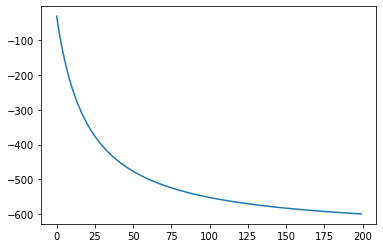

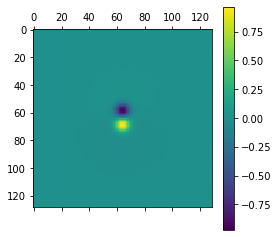

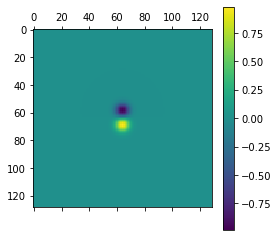

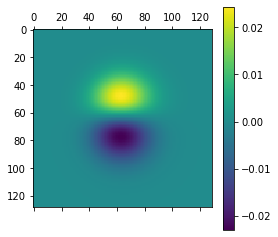

In [98]:
g = Grid(N)
g.run()
g.plot()

In [94]:
list(range(g.grid.shape[0]))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128]